In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from ghost_xarray import load_scalar_timeseries

output_dir = Path("problema4/output")

## 4)
Haciendo uso del solver BOUSS en GHOST,
resuelva numéricamente las ecuaciones para un flujo incompresible
con $ρ_0 = 1$, $ν = κ = 3 × 10^{−3}$
en un recinto cubico de longitud lineal $2π$
y resolución espacial $N_x = N_y = N_z = 128$.
Hacer uso del Material Adicional.
Imponga un viento horizontal uniforme $u = U x̂$ (con $U = 1$),
y perturbe este viento con una fuerza $f = f_0 ẑ$
confinada a una banda vertical con $x ∈ [0, π/10]$.
Observe que este es un modelo simplificado
para el estudio de ondas de sotavento.

### (a)
Para $f_0 = 0.1$,
integre el sistema hasta $t = 5$
con una frecuencia de Brunt-Väisälä $N = 10$.
Verifique que se genera una onda estacionaria.
*Ayuda: puede guardar los campos cada $∆t = 0.5$,
y observar cortes de la temperatura en el plano $x̂ − ẑ$.*

In [5]:
def load_temperature(N, *, chunks={}):
    return load_scalar_timeseries(
        output_dir / f"N_{N}",
        name="th",
        dt=0.5,
        coords=(128, 128, 128),
        dtype=np.float32,
        chunks=chunks,
    )
    
T = load_temperature(10)

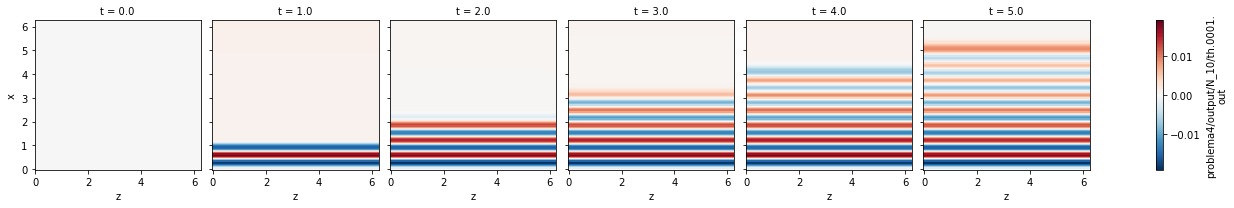

In [4]:
T.isel(t=slice(0,None,2), y=64).plot(col="t")

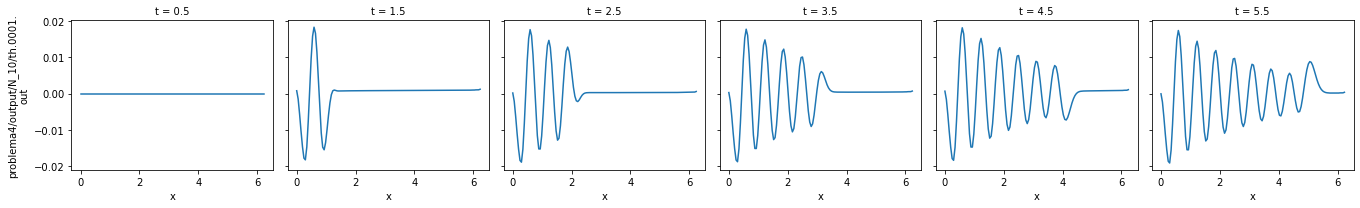

In [26]:
T.isel(t=slice(0,None,2), y=64, z=64).plot(col="t")

### (b)
Estudie la longitud de onda de la onda estacionaria
en función de la frecuencia de Brunt-Väisälä $N$,
variándola entre $1$ y $15$ (pasos de a $3$).

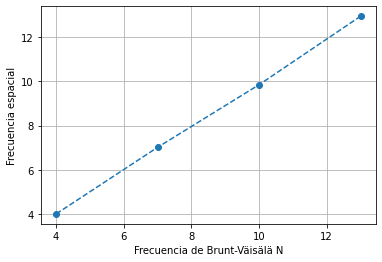

In [11]:
def calc_angular_frequency(n):
    T = load_temperature(n)
    Tx = T.isel(t=-1, y=64, z=64).to_numpy()
    ix, _ = find_peaks(Tx, height=Tx.max() / 10)
    period = T.x[ix].diff("x").mean()
    return 2 * np.pi / period

N = np.arange(1, 15, 3)[1:]
spatial_freq = np.array([calc_angular_frequency(n) for n in N])

plt.plot(N, spatial_freq, 'o--')
plt.xlabel("Frecuencia de Brunt-Väisälä N")
plt.ylabel("Frecuencia espacial")
plt.grid()